In [ ]:
data = pd.read_csv('/path/to/your/anemia-manual-input-dataset')
data.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender
plt.figure(figsize=(8,6))
ax = sns.countplot(x = data['Gender'])
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# Hemoglobin

sns.displot(data['Hemoglobin'],kde = True)

print(f'''Mean : {np.mean(data['Hemoglobin']):.2f},
Median : {np.median(data['Hemoglobin'])},
Skewness : {data['Hemoglobin'].skew():.2f},
Kurtosis : {data['Hemoglobin'].kurtosis():.2f}
''')

In [ ]:
sns.pairplot(data)

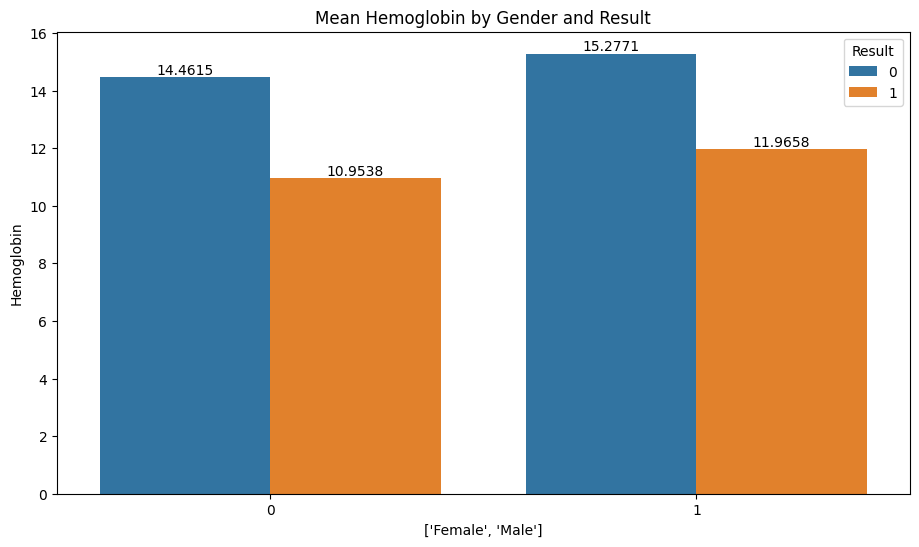

In [8]:
plt.figure(figsize=(11,6))
ax= sns.barplot(y= data['Hemoglobin'],x = data['Gender'],hue = data['Result'],errorbar=None)
ax.set(xlabel=['Female','Male'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mean Hemoglobin by Gender and Result")
plt.show()

In [9]:
x = np.array(data.drop('Result',axis =1))
y = np.array(data['Result'])
y_data = data[['Result']]

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [13]:
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "Knn": KNeighborsClassifier(),
    "S.V.C.": SVC(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42)
}

In [ ]:
for name in models.keys():
    model = models[name]
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    auc_train = roc_auc_score(y_train, y_pred_train)
    auc_test = roc_auc_score(y_test, y_pred_test)
        
    print("--"*10, f" {name} ", "--"*10)
    print(f"\nAccuracy score: \tTrain: {round(accuracy_train,2)} \tTest: {round(accuracy_test,2)}")
    print(f"\nAUC score: \t\tTrain: {round(auc_train,2)} \tTest: {round(auc_test,2)}\n")

In [15]:
model_neural = Sequential([
    Dense(512,activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(128,activation = 'relu',kernel_regularizer= tf.keras.regularizers.l2(0.1)),
    Dense(1,activation= 'sigmoid')
])

In [16]:
model_neural.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=  tf.keras.optimizers.Adam(learning_rate = 0.001),metrics = ["accuracy"])

In [ ]:
model_neural.fit(X_train,y_train,epochs=100)

In [ ]:
import joblib

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

joblib.dump(rf_model, 'random_forest_model.joblib')

print("Model saved successfully using joblib!")

In [ ]:
loaded_rf_model = joblib.load('/kaggle/working/random_forest_model.joblib')

y_pred_test = loaded_rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

accuracy_train_list = []
accuracy_test_list = []
auc_train_list = []
auc_test_list = []

for name in models.keys():
    model = models[name]
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    auc_train = roc_auc_score(y_train, y_pred_train)
    auc_test = roc_auc_score(y_test, y_pred_test)
    
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
    print(f"-- {name} --")
    print(f"Accuracy Train: {accuracy_train:.2f}, Test: {accuracy_test:.2f}")
    print(f"AUC Train: {auc_train:.2f}, Test: {auc_test:.2f}")

model_names = list(models.keys())

accuracy_train_list = np.array(accuracy_train_list)
accuracy_test_list = np.array(accuracy_test_list)
auc_train_list = np.array(auc_train_list)
auc_test_list = np.array(auc_test_list)

x = np.arange(len(model_names))
width = 0.35
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(x - width/2, accuracy_train_list, width, alpha=0.6, label='Train Accuracy', color='blue')
plt.bar(x + width/2, accuracy_test_list, width, alpha=0.6, label='Test Accuracy', color='orange')
plt.title('Model Accuracy (Train vs Test)')
plt.ylabel('Accuracy')
plt.xticks(x, model_names, rotation=45)
plt.legend()

# AUC plot
plt.subplot(1, 2, 2)
plt.bar(x - width/2, auc_train_list, width, alpha=0.6, label='Train AUC', color='green')
plt.bar(x + width/2, auc_test_list, width, alpha=0.6, label='Test AUC', color='red')
plt.title('Model AUC (Train vs Test)')
plt.ylabel('AUC')
plt.xticks(x, model_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()